In [4]:
import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


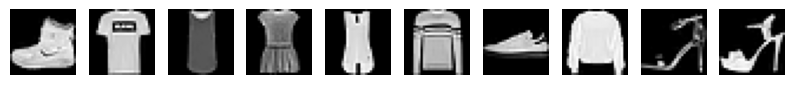

In [8]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap = 'gray')
  axs[i].axis('off')
plt.show()


In [9]:
print([train_target[i] for i in range(10)])

[np.uint8(9), np.uint8(0), np.uint8(0), np.uint8(3), np.uint8(0), np.uint8(2), np.uint8(7), np.uint8(2), np.uint8(5), np.uint8(5)]


In [10]:
import numpy as np
print(np.unique(train_target, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [11]:
#reshape() 매서드를 사용해 2차원 배열인 각 샘플을 1차원 배열로 전개 후 변환된 train_scaled의 크기 확인
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

print(train_scaled.shape)

(60000, 784)


In [12]:
#SGDClassifier 클래스와 cross_validate함수를 이용해 이 데이터에서 교차 검증으로 성능 확인
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log_loss', max_iter=5, random_state = 42) #max_iter값은 반복횟수를 의미함
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8194166666666666


In [13]:
#max_iter값이 10인 경우
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log_loss', max_iter= 10, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8311666666666667


In [14]:
#max_iter값이 20인 경우
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log_loss', max_iter= 20, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8437333333333334


In [15]:
#케라스 임포트
import keras

In [16]:
#케라스가 사용중인 백엔드 확인
keras.config.backend()

'tensorflow'

In [17]:
#케라스의 백엔드 변경
import os
os.environ["KERAS_BACKEND"] = "torch"

In [ ]:
import os
os.environ["KERAS_BACKEND"] = "jax"

In [18]:
#패션 mnist데이터셋에서 검증 세트 나누기
#1. T사이킷런의 train_test_split() 함수
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)
#2. 훈련 세트와 검증 세트의 크기 확인
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [20]:
#케라스에서 입력층을 정의 - Input() 함수
inputs = keras.layers.Input(shape=(784,))

In [22]:
#밀집층 만들기
dense = keras.layers.Dense(10, activation = 'softmax')

In [23]:
#입력층과 밀집층을 가진 신경망 모델 만들기
model = keras.Sequential([inputs, dense])